<a href="https://colab.research.google.com/github/Zerowl7/Time_serias/blob/main/Time_serias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings; 
warnings.simplefilter('ignore')

Входные данные для Prophet всегда представляют собой фрейм данных с двумя столбцами: dsи y. Столбец ds(отметка даты) должен иметь формат, ожидаемый Pandas, в идеале ГГГГ-ММ-ДД для даты или ГГГГ-ММ-ДД ЧЧ:ММ:СС для отметки времени. Столбец yдолжен быть числовым и представлять измерение, которое мы хотим спрогнозировать.

# Установка и импорт

In [2]:
!pip install pystan
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from fbprophet import Prophet

# Считывание данных

In [24]:
df = pd.read_csv('dataset.csv')

In [25]:
df

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000000
1,2012018,2667437,QLD_CW_ST0203,2687.531000
2,3012018,2667437,QLD_CW_ST0203,2793.000000
3,4012018,2667437,QLD_CW_ST0203,2394.000000
4,5012018,2667437,QLD_CW_ST0203,2660.000000
...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329


Преобразование времени

In [26]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [27]:
#запрос
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
# избавляемся от всех нашых ненужных колонок
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

Оставляем только value и ds

In [28]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# Тренировка модели

Мы подгоняем модель, создавая экземпляр нового Prophetобъекта. Любые настройки процедуры прогнозирования передаются в конструктор. Затем вы вызываете его fitметод и передаете исторический фрейм данных. Примерка должна занять 1-5 секунд.

In [29]:
# Ширину интервалов неопределенности 
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

# Прогноз

Затем прогнозы делаются в кадре данных со столбцом ds, содержащим даты, для которых должен быть сделан прогноз. Вы можете получить подходящий фрейм данных, который простирается в будущее на указанное количество дней, используя вспомогательный метод Prophet.make_future_dataframe. По умолчанию он также будет включать даты из истории, поэтому мы также увидим, что модель подходит.

In [37]:
future = m.make_future_dataframe(periods=365,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.168654,856.053345,3939.569301,3040.168654,3040.168654,-646.907682,-646.907682,-646.907682,462.591916,...,16.646724,16.646724,16.646724,-1126.146323,-1126.146323,-1126.146323,0.0,0.0,0.0,2393.260972
1,2018-01-02,3040.968888,907.382240,4017.387375,3040.968888,3040.968888,-656.878775,-656.878775,-656.878775,462.591916,...,-11.260909,-11.260909,-11.260909,-1108.209782,-1108.209782,-1108.209782,0.0,0.0,0.0,2384.090113
2,2018-01-03,3041.769121,753.430557,4077.797088,3041.769121,3041.769121,-630.891873,-630.891873,-630.891873,462.591916,...,-4.393592,-4.393592,-4.393592,-1089.090198,-1089.090198,-1089.090198,0.0,0.0,0.0,2410.877248
3,2018-01-04,3042.569354,898.856181,4040.383702,3042.569354,3042.569354,-583.805741,-583.805741,-583.805741,462.591916,...,22.468361,22.468361,22.468361,-1068.866019,-1068.866019,-1068.866019,0.0,0.0,0.0,2458.763613
4,2018-01-05,3043.369588,865.817158,4021.880517,3043.369588,3043.369588,-619.671450,-619.671450,-619.671450,462.591916,...,-34.595035,-34.595035,-34.595035,-1047.668332,-1047.668332,-1047.668332,0.0,0.0,0.0,2423.698137


In [32]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4241.650617,2066.255643,5183.469909,4238.895120,4244.263110,-519.180540,-519.180540,-519.180540,462.591916,...,16.646724,16.646724,16.646724,-998.419181,-998.419181,-998.419181,0.0,0.0,0.0,3722.470077
1176,2021-03-23,4242.718778,2049.640018,5238.347740,4239.927646,4245.364649,-536.641523,-536.641523,-536.641523,462.591916,...,-11.260909,-11.260909,-11.260909,-987.972530,-987.972530,-987.972530,0.0,0.0,0.0,3706.077255
1177,2021-03-24,4243.786939,2191.805321,5342.320191,4240.960189,4246.466188,-522.106981,-522.106981,-522.106981,462.591916,...,-4.393592,-4.393592,-4.393592,-980.305306,-980.305306,-980.305306,0.0,0.0,0.0,3721.679958
1178,2021-03-25,4244.855100,2223.195769,5370.808811,4241.992830,4247.567726,-490.940696,-490.940696,-490.940696,462.591916,...,22.468361,22.468361,22.468361,-976.000974,-976.000974,-976.000974,0.0,0.0,0.0,3753.914404
1179,2021-03-26,4245.923261,2048.279713,5277.181379,4243.025223,4248.669265,-547.561096,-547.561096,-547.561096,462.591916,...,-34.595035,-34.595035,-34.595035,-975.557978,-975.557978,-975.557978,0.0,0.0,0.0,3698.362164


Вы можете построить прогноз, вызвав Prophet.plotметод и передав свой прогноз данных. Здесь видим, как модель просчитала наши данные на год вперед то что без точек

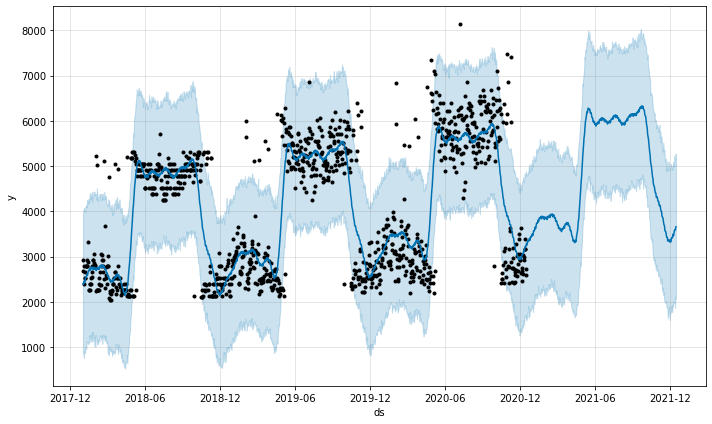

In [38]:
plot1 = m.plot(forecast)

Если вы хотите увидеть компоненты прогноза, вы можете использовать этот Prophet.plot_componentsметод. По умолчанию вы увидите тенденцию, годовую сезонность и еженедельную сезонность временного ряда.

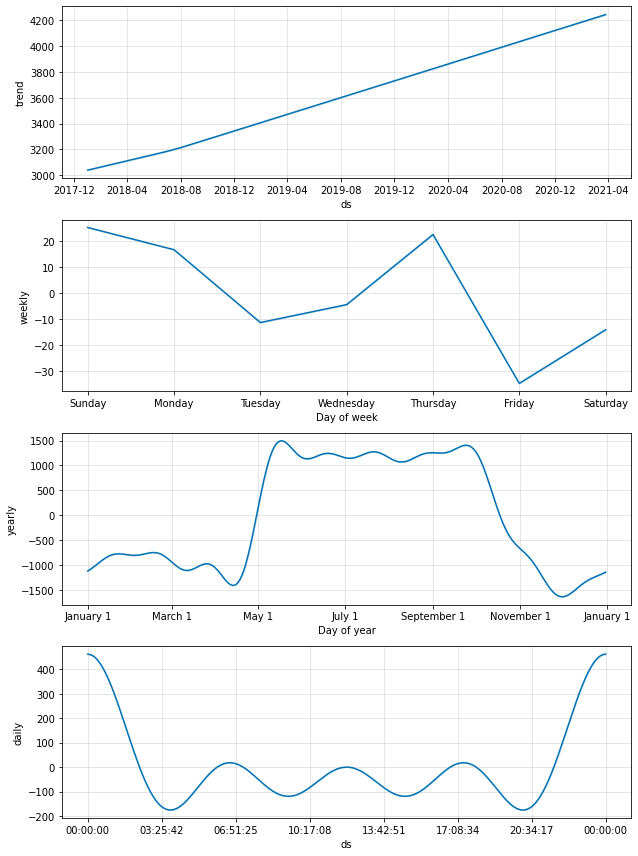

In [35]:
plt2 = m.plot_components(forecast)

Рассматривая тренд видим, что у нас линия уносится вверх. Далее y значения стоит воспринимать относительно нуля как наполнение или покупку товаров в этом магазине. Видим, что в Воскресенье идет набор товаров там идет большой +, а - у нас в пятницу, в четверг происходит также прирост товаров, наверное перед пятницей

Также наблюдается ежемесчная сезонность, где с мая по ноябрь y находитс в положительном значении

Полезные ссылки:
1. Интервалы неопределенности
https://facebook.github.io/prophet/docs/uncertainty_intervals.html